In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline


In [36]:
file = pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\charang\mlprojects\housepriceprediction.csv")

In [37]:
file.head()

,House_ID,Location,Square_Feet,Number_of_Bedrooms,Number_of_Bathrooms,Number_of_Floors,Year_Built,Year_Renovated,Price
0,1,Mumbai,2500,3,2.0,2,2000,2015,350000
1,2,Delhi,3000,4,3.0,2,1995,0,420000
2,3,Bengaluru,1800,2,1.0,1,2010,0,250000
3,4,Chennai,3200,5,3.5,2,2005,2018,550000
4,5,Kolkata,2700,4,2.5,1,1990,0,380000


In [38]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   House_ID             132 non-null    int64  
 1   Location             132 non-null    object 
 2   Square_Feet          132 non-null    int64  
 3   Number_of_Bedrooms   132 non-null    int64  
 4   Number_of_Bathrooms  132 non-null    float64
 5   Number_of_Floors     132 non-null    int64  
 6   Year_Built           132 non-null    int64  
 7   Year_Renovated       132 non-null    int64  
 8   Price                132 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 9.4+ KB


In [39]:
file.describe()

,House_ID,Square_Feet,Number_of_Bedrooms,Number_of_Bathrooms,Number_of_Floors,Year_Built,Year_Renovated,Price
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,66.500000,2654.545455,3.234848,2.219697,1.393939,2002.909091,152.825758,383939.393939
std,38.249183,711.236278,0.889805,0.893696,0.490483,9.385269,535.831201,119450.124222
min,1.000000,1500.000000,2.000000,1.000000,1.000000,1985.000000,0.000000,200000.000000
25%,33.750000,2100.000000,3.000000,2.000000,1.000000,1995.000000,0.000000,290000.000000
50%,66.500000,2600.000000,3.000000,2.000000,1.000000,2004.000000,0.000000,360000.000000
75%,99.250000,3100.000000,4.000000,3.000000,2.000000,2010.250000,0.000000,452500.000000
max,132.000000,4300.000000,5.000000,4.500000,2.000000,2020.000000,2020.000000,690000.000000


In [40]:
file.columns

Index(['House_ID', 'Location', 'Square_Feet', 'Number_of_Bedrooms',
       'Number_of_Bathrooms', 'Number_of_Floors', 'Year_Built',
       'Year_Renovated', 'Price'],
      dtype='object')

In [41]:
x = file[['Square_Feet', 'Number_of_Bedrooms',
       'Number_of_Bathrooms', 'Number_of_Floors', 'Year_Built',
       'Year_Renovated']]
y = file['Price']

TRAIN TEST SPLIT

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train , x_test, y_train, y_test = train_test_split(x, y , test_size=0.6)

Creating and training Model

In [44]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

MODEL EVALUATION

In [45]:
print(lr.intercept_)

-4351597.42395459


In [46]:
coeff_ = pd.DataFrame(lr.coef_, x.columns,columns = ['Coefficients'])
coeff_

,Coefficients
Square_Feet,122.390652
Number_of_Bedrooms,23128.302910
Number_of_Bathrooms,12376.716538
Number_of_Floors,-5301.495576
Year_Built,2155.063929
Year_Renovated,4.864534


In [47]:
pred = lr.predict(x_test)

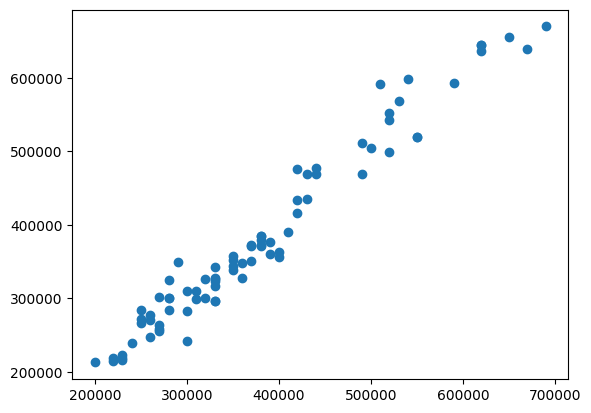

In [48]:
plt.scatter(y_test, pred)

In [49]:
from sklearn import metrics

In [50]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 19312.31075813535
MSE: 636158882.3326582
RMSE: 25222.190276275735
